In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

In [6]:
%%manim -qm -v WARNING MexicoBandera
config.assets_dir = "./assets"

class MexicoBandera(Scene):
    def construct(self):
        big_rec = Rectangle(width=7,height=4,fill_opacity=1,color=WHITE)
        GREEN_FLAG_COLOR = "#005940"
        RED_FLAG_COLOR   = "#BE1126"

        green_rec = big_rec.copy()
        green_rec.scale([1/3,1,1],about_edge=LEFT).set_color(GREEN_FLAG_COLOR)
        red_rec = big_rec.copy()
        red_rec.scale([1/3,1,1],about_edge=RIGHT).set_color(RED_FLAG_COLOR)

        logo = SVGMobject("mexico_logo").scale(0.9)

        self.play(
            Write(big_rec),
            Write(green_rec),
            Write(red_rec),
        )
        self.play(Write(logo,stroke_color=BLACK,run_time=3))
        self.wait()

In [9]:
%%manim -qm -v WARNING Piano

config.assets_dir = "./assets"

class Piano(Scene):
    def get_piano(self):
        piano = []
        white_key = Rectangle(width=1,height=5,fill_opacity=1,fill_color=WHITE,stroke_color=BLACK)
        black_key = Rectangle(width=0.6,height=3,fill_opacity=1,color=BLACK)
        keys  = "WBWBWWBWBWBW" # * 2 for 2 octaves
        notes = "CXDXEFXGXAXB"
        white_keys = []
        black_keys = []
        for i,k in enumerate(keys):
            rec = white_key.copy() if k == "W" else black_key.copy()
            rec.key = k
            rec.note = notes[i]
            if i >= 1:
                if k == "W":
                    if piano[i-1].key == "B":
                        rec.next_to(piano[i-1],RIGHT,buff=-piano[i-1].width/2,aligned_edge=UP)
                    else:
                        rec.next_to(piano[i-1],RIGHT,buff=0,aligned_edge=UP)
                else:
                    rec.next_to(piano[i-1],RIGHT,buff=-rec.width/2,aligned_edge=UP)
            piano.append(rec)
            if k == "W": white_keys.append(rec)
            else: black_keys.append(rec)
        return Group(*white_keys,*black_keys)

    def construct(self):
        piano = self.get_piano()
        piano.move_to(ORIGIN)
        self.add(piano)
        melody_progression1 = "CCGGAAGPFFEEDDC"
        melody_progression2 = "CDECCDECEFGPEFGP"
        for note in melody_progression1:
            if note != "P":
                self.add_sound(f"notes/{note}")
                key_note = list(filter(lambda x: (x.note==note),piano))[0]
                self.play(FadeToColor(key_note,RED,rate_func=there_and_back,run_time=0.2))
                self.wait(0.3)
            else:
                self.wait(0.5)

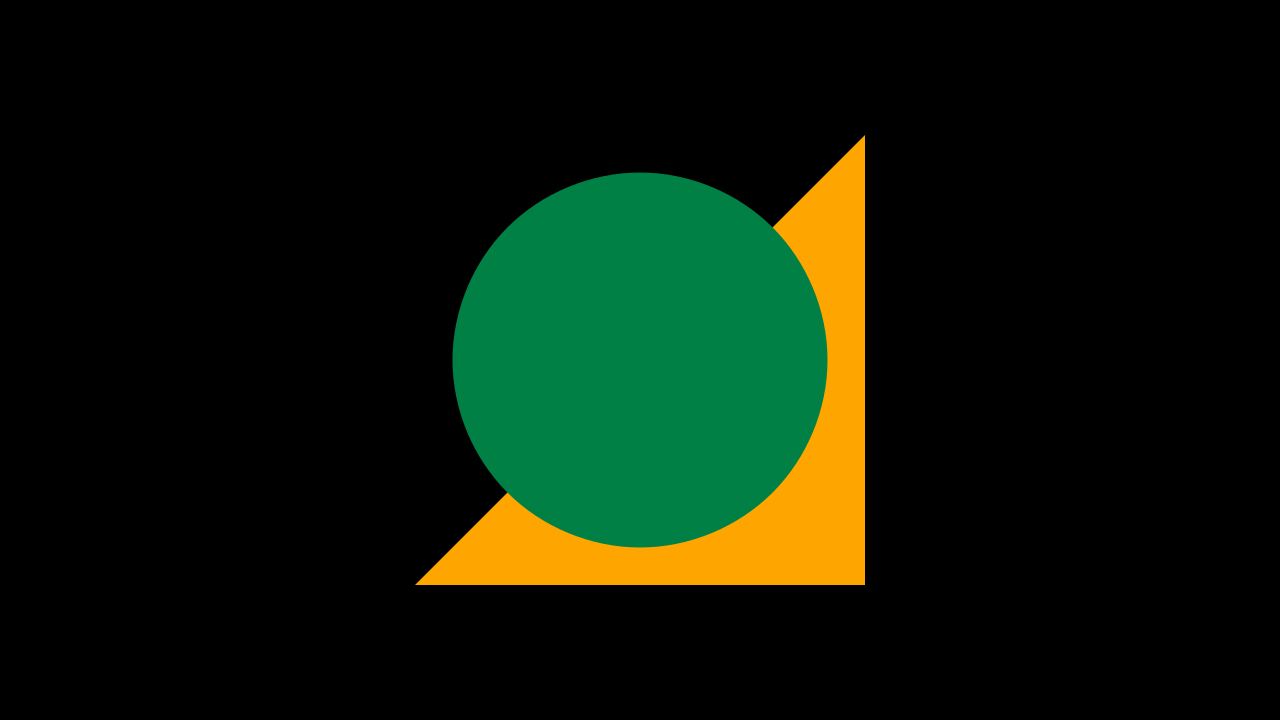

In [10]:
%%manim -qm -v WARNING Ex1

class Ex1(Scene):
    def construct(self):
        svg = SVGMobject("mask_example")
        svg.height = config.frame_height - 3
        self.add(svg)

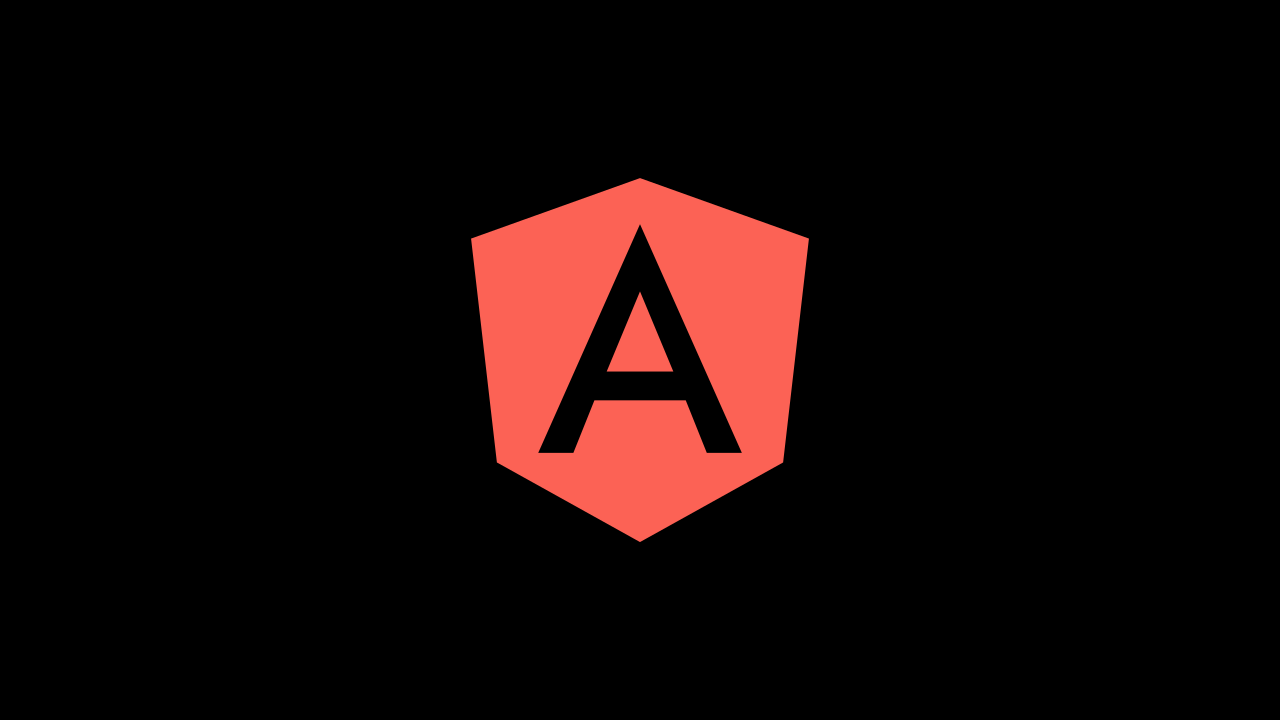

In [11]:
%%manim -qm -v WARNING Ex2

class Ex2(Scene):
    def construct(self):
        self.add(
            SVGMobject("angular-brands",color=RED)
                .scale(2)
        )

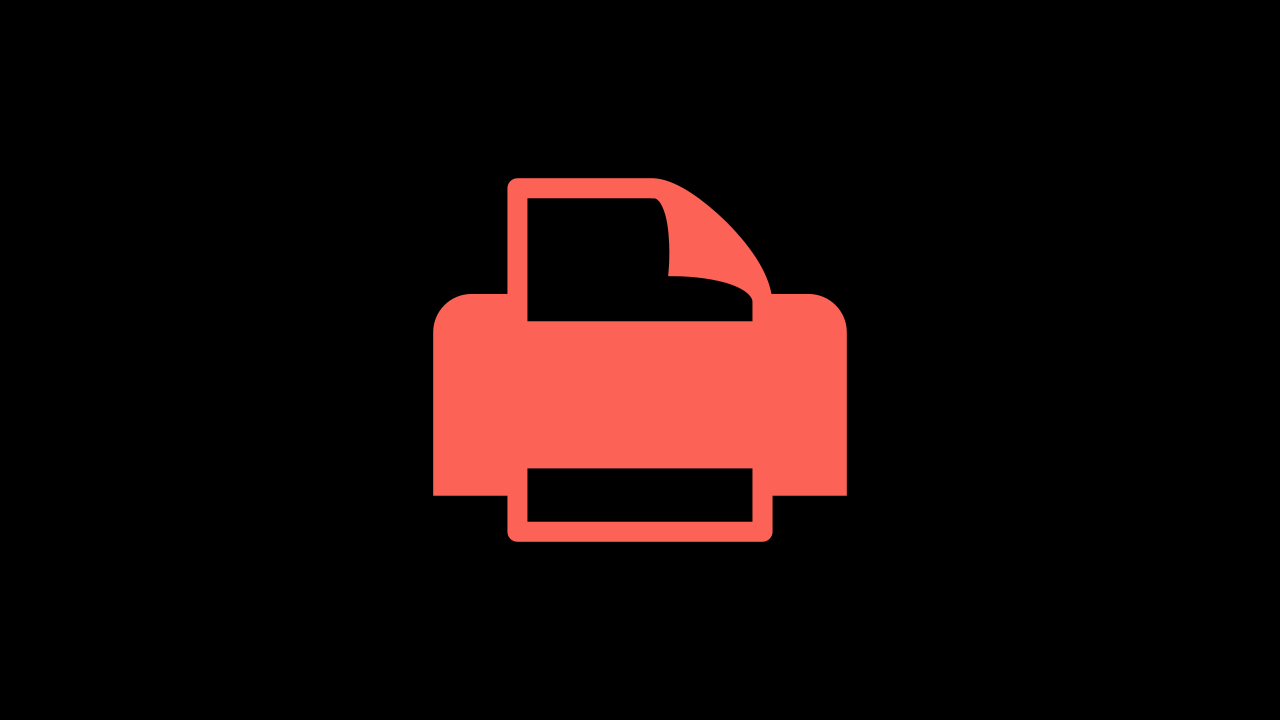

In [12]:
%%manim -qm -v WARNING Ex3

class Ex3(Scene):
    def construct(self):
        self.add(
            SVGMobject("some_svg",color=RED)
                .scale(2)
        )

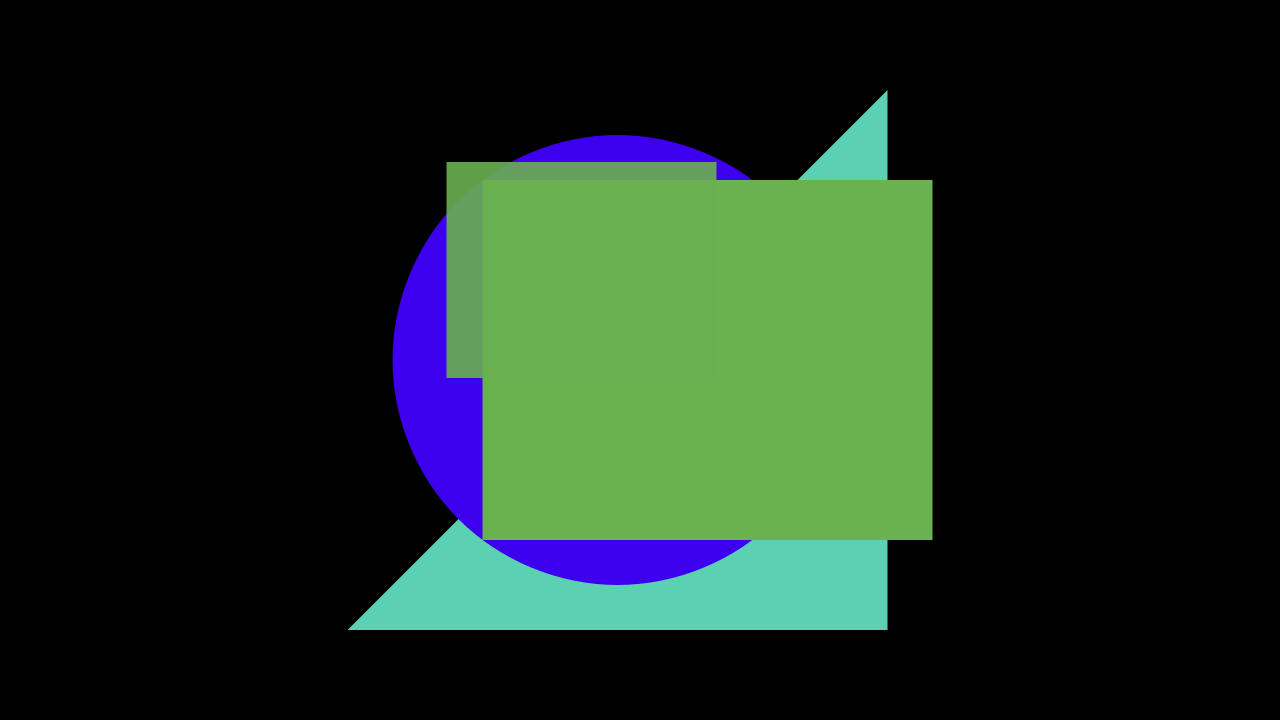

In [13]:
%%manim -qm -v WARNING Ex4

class Ex4(Scene):
    def construct(self):
        svg = SVGMobject("basic_svg").scale(3)
        polygon = svg[0]
        circle = svg[1]
        big_rect = svg[2]
        small_rect = svg[3]

        polygon.set_color(TEAL)
        big_rect.set_opacity(1)

        self.add(svg)

In [14]:
%%manim -qm -v WARNING Ex6

class Ex6(Scene):
    def construct(self):
        sq = Square(fill_opacity=1)

        self.play(FadeToColor(sq,RED,run_time=2))
        self.wait()
        self.add_sound("sound_5_secs")
        self.play(FadeToColor(sq,BLUE,run_time=1))
        self.play(FadeToColor(sq,GREEN,run_time=3))
        self.wait(2)
        self.play(FadeToColor(sq,YELLOW,run_time=2))
        self.wait()